# Sentiment Analysis of GITA GPT

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('GITA_GPT.txt', delimiter='\t', header=None, names=['Index', 'Text'])
print(data.head())

   Index                                               Text
0      0  1:1 Dhritarastra said: O Sanjaya, what did my ...
1      1  1:2 Sanjaya said: But then, seeing the army of...
2      2  1:3 O teacher, (please) see this vast army of ...
3      3  1:4 There are in this army, heroes wielding gr...
4      4  1:5 Dhrstaketu, Cekitana, and the valiant king...


In [4]:
data['Sentiment'] = 'negative'

In [5]:
positive_indices = np.random.choice(data.index, int(0.2 * len(data)), replace=False)
data.loc[positive_indices, 'Sentiment'] = 'positive'

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['Sentiment'])


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['Text'], y_encoded, test_size=0.2, random_state=42)


In [8]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [9]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
svm_predictions = svm_model.predict(X_test_tfidf)


In [10]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy*100)

SVM Accuracy: 81.42857142857143


 This accuracy score indicates that our SVM model successfully classified sentiments in the test set, with nearly 81% of the predictions being correct. A higher accuracy score suggests a more effective sentiment analysis model. 

In [18]:
support_vectors = svm_model.support_vectors_
print("\nSupport Vectors:")
print(support_vectors)



Support Vectors:
  (0, 29)	0.2376082216649124
  (0, 163)	0.06568890631181527
  (0, 253)	0.12256980520917832
  (0, 350)	0.21097181658274958
  (0, 547)	0.3072392808303612
  (0, 737)	0.2376082216649124
  (0, 1128)	0.3072392808303612
  (0, 1339)	0.22429001912383098
  (0, 1375)	0.27515012608115735
  (0, 1398)	0.24924278904971947
  (0, 1539)	0.28846832862223876
  (0, 1997)	0.20301603223727302
  (0, 2125)	0.21097181658274958
  (0, 2126)	0.107983170872729
  (0, 2372)	0.17216148037113674
  (0, 2382)	0.20301603223727302
  (0, 2396)	0.17342991216650466
  (0, 2424)	0.2327305708769965
  (0, 2456)	0.33258705468637845
  (1, 146)	0.2108558706800189
  (1, 163)	0.04508177306287738
  (1, 253)	0.08411868080999513
  (1, 285)	0.18174366789703225
  (1, 311)	0.2108558706800189
  (1, 345)	0.11489154547467491
  :	:
  (438, 226)	0.18036705547465645
  (438, 289)	0.22341336809640222
  (438, 348)	0.20275371765800626
  (438, 536)	0.25290862643672724
  (438, 843)	0.18660542369738423
  (438, 897)	0.11467908267538883


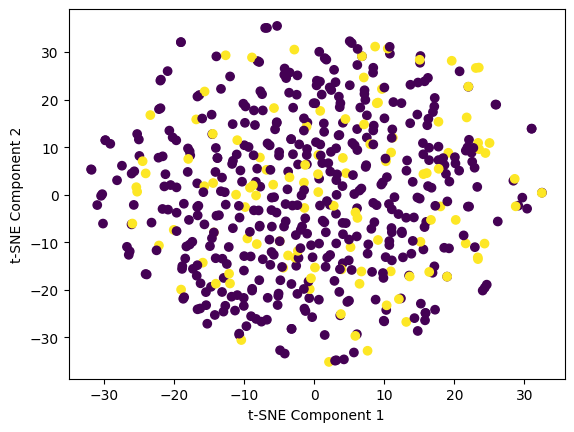

In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE(n_components=2)
X_train_tfidf_tsne = tsne.fit_transform(X_train_tfidf.toarray())

plt.scatter(X_train_tfidf_tsne[:, 0], X_train_tfidf_tsne[:, 1], c=y_train, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()
